In [3]:
import pandas as pd
import numpy as np

# Crear un dataset simulado
np.random.seed(42)
data = {
    "Estudiante": [f"E{i}" for i in range(1, 21)],
    "Edad": np.random.randint(18, 25, size=20),
    "Género": np.random.choice(["Femenino", "Masculino"], size=20),
    "Nota_Matemáticas": np.random.normal(70, 10, size=20).round(1),
    "Nota_Ciencias": np.random.normal(75, 12, size=20).round(1),
    "Nota_Inglés": np.random.normal(65, 15, size=20).round(1),
}
#data
data=pd.DataFrame(data)
print(data.tail())
print(data.shape)# filas, columnas

   Estudiante  Edad     Género  Nota_Matemáticas  Nota_Ciencias  Nota_Inglés
15        E16    20   Femenino              58.4           83.7         74.6
16        E17    23   Femenino              75.7           64.9         34.3
17        E18    22  Masculino              63.0           68.8         81.0
18        E19    19  Masculino              56.2           74.5         51.0
19        E20    21  Masculino              66.5           71.7         76.8
(20, 6)


In [4]:
clientes=pd.read_csv("https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/Churn_Modelling.csv") #importo un data de github
clientes.tail()#ultimos 5, heat primeros 5
clientes.shape
clientes.shape[0]#filas
clientes.shape[1]# columnas
clientes.size #tamaño del dataset
clientes.columns # nombre de las columnas


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df= pd.DataFrame(data)# lo vuelvo un data frame
df.head()
df.dtypes#muestra el tipo de dato
df["Estudiante"]=df["Estudiante"].astype(str)# cambio el tipo de dato
df.dtypes

Estudiante           object
Edad                  int32
Género               object
Nota_Matemáticas    float64
Nota_Ciencias       float64
Nota_Inglés         float64
dtype: object

In [6]:
df.describe()# muestra las estadisticas del df
df.describe(include=object)# espesifica que tipo de dato quieres ver


,Estudiante,Género
count,20,20
unique,20,2
top,E1,Masculino
freq,1,12


In [7]:
contargenero=df.Género.value_counts(ascending=False)# total de datos de cada genero
contargenero
print(contargenero['Masculino'])#espesifica el genero
print(contargenero['Femenino'])
total=contargenero['Femenino']+contargenero['Masculino']
porcentajeH=(contargenero['Masculino']/total)*100
porcentajeF=(contargenero['Femenino']/total)*100
print(porcentajeH)
print(porcentajeF)
df.Género.count()

12
8
60.0
40.0


np.int64(20)

<BarContainer object of 2 artists>

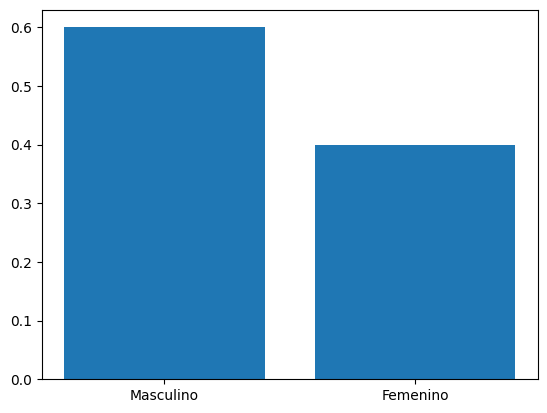

In [8]:
#sacar el porcentaje de género
from matplotlib import pyplot as plt    #grafico de barras
cantidad=df.Género.value_counts(normalize=True)
plt.bar(cantidad.index, cantidad.values)
#df["Género"].value_counts()

<Axes: ylabel='count'>

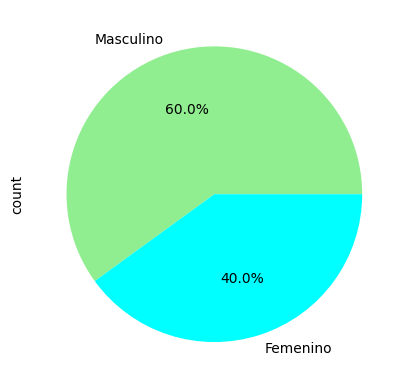

In [9]:
from enum import auto #grafico de pastel
contargenero.plot(kind="pie",autopct="%1.1f%%", colors=["lightgreen", "aqua"], startangle=0)

In [ ]:
medianas=df.select_dtypes(np.number).drop(columns=['Edad']).median()

materia_mejor=medianas.idxmax()# id de la materia con mejor mediana
mejor_mediana=medianas.max() # nota de la materia con mejor mediana

materia_peor=medianas.idxmin()
peor_mediana=medianas.min()

print(medianas)
print(f"la materia con merjor mediana es {materia_mejor} con la nota {mejor_mediana}")
print(f'la materia con peor mediana es {materia_peor} con la nota de {peor_mediana}')


Nota_Matemáticas    69.35
Nota_Ciencias       75.90
Nota_Inglés         71.60
dtype: float64
la materia con merjor mediana es Nota_Ciencias con la nota 75.9
la materia con peor mediana es Nota_Matemáticas con la nota de 69.35


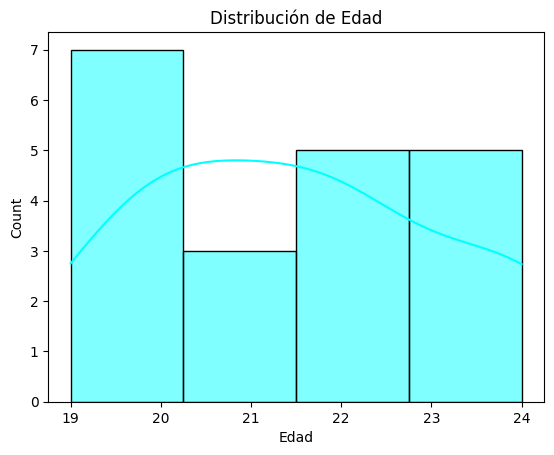

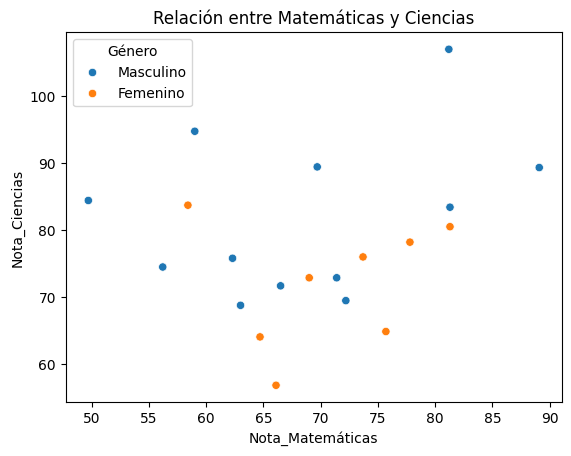

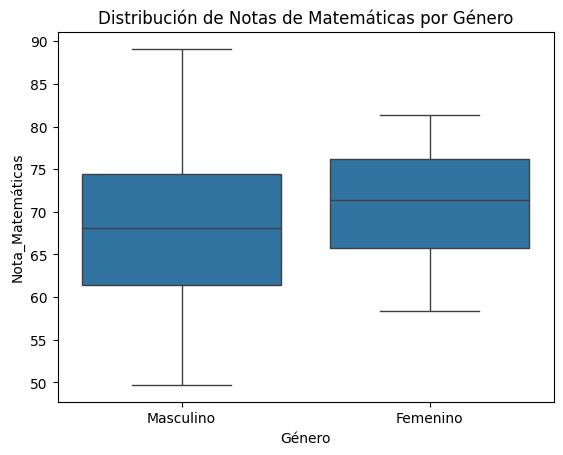

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de edades
sns.histplot(df['Edad'], bins=4, kde=True, color='aqua')
plt.title("Distribución de Edad")
plt.show()

# Gráfico de dispersión: Nota_Matemáticas vs Nota_Ciencias
sns.scatterplot(x="Nota_Matemáticas", y="Nota_Ciencias", hue="Género", data=df)
plt.title("Relación entre Matemáticas y Ciencias")
plt.show()

# Boxplot de notas por género
sns.boxplot(x="Género", y="Nota_Matemáticas", data=df)
plt.title("Distribución de Notas de Matemáticas por Género")
plt.show()

Conteo de valores por género:
Género
Masculino    12
Femenino      8
Name: count, dtype: int64


C:\Users\mvale\AppData\Local\Temp\ipykernel_26372\833936254.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genero_counts.index, y=genero_counts.values, palette="pastel")


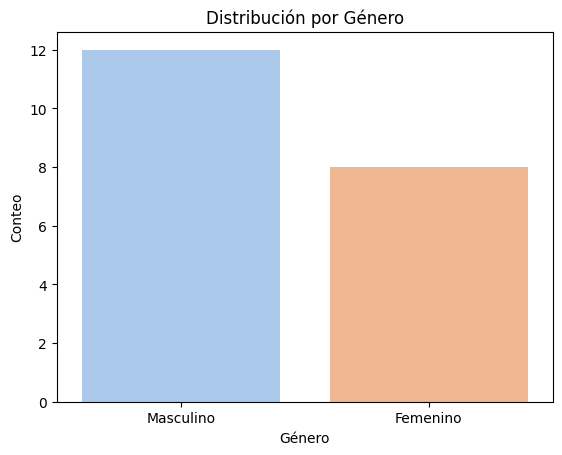

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo de valores únicos en la columna "Género"
genero_counts = df["Género"].value_counts()

print("Conteo de valores por género:")
print(genero_counts)

# Gráfico de barras para visualizar el conteo de género
sns.barplot(x=genero_counts.index, y=genero_counts.values, palette="pastel")
plt.title("Distribución por Género")
plt.xlabel("Género")
plt.ylabel("Conteo")
plt.show()

In [ ]:
valores_unicos=df.Edad.unique()# valores que solo estan 1 vez
conteo_valores_unicos=df.Edad.nunique() # conteo de los valores unicos
print(valores_unicos)
print(conteo_valores_unicos)

[24 21 22 20 19 23]
6


In [20]:
df[(df.Edad)<23].iloc[:,-3:] #seleciona los datos que tengan una edad menor a 23
# el -3 selecciona las ultimas 3 columnas

,Nota_Matemáticas,Nota_Ciencias,Nota_Inglés
1,62.3,75.8,53.1
2,71.4,72.9,79.0
4,81.3,83.4,75.5
5,69.0,72.9,67.6
6,64.7,64.1,74.9
8,49.7,84.4,62.5
9,81.2,106.9,82.5
11,59.0,94.7,53.5
12,81.3,80.5,83.2
13,73.7,76.0,83.5


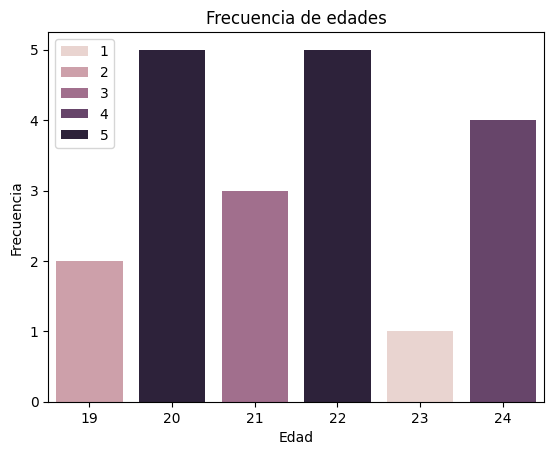

In [ ]:
edad_counts=df['Edad'].value_counts()
edad_counts
sns.barplot(x=edad_counts.index,y=edad_counts.values,hue=edad_counts.values)#hue es la coso pequeño en la esquina superior
plt.title('Frecuencia de edades')
plt.xlabel=("Edades")
plt.ylabel('Frecuencia')
plt.show()

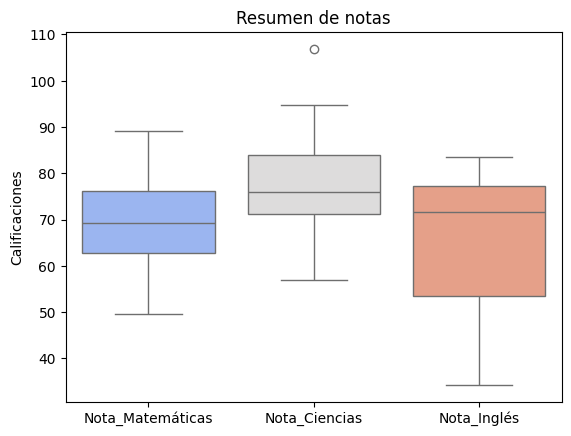

In [ ]:
sns.boxplot(data=df[["Nota_Matemáticas", "Nota_Ciencias", "Nota_Inglés"]], palette="coolwarm")
plt.title('Resumen de notas')
plt.ylabel('Calificaciones')
plt.show()

In [ ]:
df[(df.Nota_Ciencias)>100] #condicional que muestra las notas mayores a 100

,Estudiante,Edad,Género,Nota_Matemáticas,Nota_Ciencias,Nota_Inglés
9,E10,20,Masculino,81.2,106.9,82.5


In [ ]:
df.loc[df.index[9],'Nota_Ciencias']=100 #cambia el valor de la nota de ciencias en el index 9
df.iloc[9] # mostramos todos los datos de ese index

Estudiante                E10
Edad                       20
Género              Masculino
Nota_Matemáticas         81.2
Nota_Ciencias           100.0
Nota_Inglés              82.5
Name: 9, dtype: object

In [62]:
print('Info del dataset')
df.info() # muestra la info del dataset

Info del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estudiante        20 non-null     object 
 1   Edad              20 non-null     int32  
 2   Género            20 non-null     object 
 3   Nota_Matemáticas  20 non-null     float64
 4   Nota_Ciencias     20 non-null     float64
 5   Nota_Inglés       20 non-null     float64
 6   Notas_Ciencias    0 non-null      float64
dtypes: float64(4), int32(1), object(2)
memory usage: 1.1+ KB


In [70]:
df.loc[df.index[4],'Nota_Ciencias']=np.nan #vuelve vuelve el index en nulo
df.head()
df.isnull()#muestra cuales valores son nulos con true y false
valores_nulos=df.isnull().sum()# nulos por columnas
valores_nulos

Estudiante           0
Edad                 0
Género               0
Nota_Matemáticas     0
Nota_Ciencias        1
Nota_Inglés          0
Notas_Ciencias      20
dtype: int64

In [ ]:
df[df.Notas_Ciencias.isnull()]#buscamos cual es null
df.loc[df.index[4],'Nota_Ciencias']=df.Nota_Ciencias.median()#le damos el valor de la media al null
df.head()

,Estudiante,Edad,Género,Nota_Matemáticas,Nota_Ciencias,Nota_Inglés,Notas_Ciencias
0,E1,24,Masculino,72.2,69.5,41.6,NaN
1,E2,21,Masculino,62.3,75.8,53.1,NaN
2,E3,22,Masculino,71.4,72.9,79.0,NaN
3,E4,24,Masculino,69.7,89.4,75.2,NaN
4,E5,20,Masculino,81.3,75.8,75.5,NaN


In [74]:
promedios_genero=df.groupby('Género')[["Nota_Matemáticas", "Nota_Ciencias", "Nota_Inglés"]].max()
promedios_genero

,Nota_Matemáticas,Nota_Ciencias,Nota_Inglés
Género,,,
Femenino,81.3,83.7,83.5
Masculino,89.1,100.0,82.5


In [ ]:
df.drop(columns='Notas_Ciencias') #elimino la columna
df[(df['Nota_Ciencias'] > 83) & (df['Nota_Ciencias'] < 94)] #busca las notas de ciencias que esten entre ese rango

,Estudiante,Edad,Género,Nota_Matemáticas,Nota_Ciencias,Nota_Inglés,Notas_Ciencias
3,E4,24,Masculino,69.7,89.4,75.2,NaN
7,E8,24,Masculino,89.1,89.3,68.6,NaN
8,E9,19,Masculino,49.7,84.4,62.5,NaN
15,E16,20,Femenino,58.4,83.7,74.6,NaN


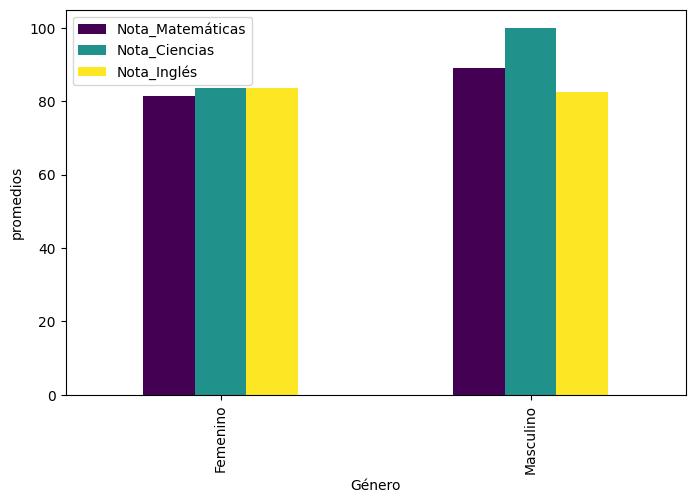

In [91]:
promedios_genero.plot(kind='bar',figsize=(8,5),colormap='viridis')
plt.ylabel('promedios')
plt.show()

In [ ]:
variables_numericas=df.select_dtypes(include=[int,float])
correlacion=variables_numericas.corr()#muestra la matriz de correlacion
correlacion#la significa que tanto incrementa una con respecto a la otra

,Edad,Nota_Matemáticas,Nota_Ciencias,Nota_Inglés,Notas_Ciencias
Edad,1.000000,0.483522,-0.179197,-0.127124,NaN
Nota_Matemáticas,0.483522,1.000000,0.138476,0.228811,NaN
Nota_Ciencias,-0.179197,0.138476,1.000000,0.358039,NaN
Nota_Inglés,-0.127124,0.228811,0.358039,1.000000,NaN
Notas_Ciencias,NaN,NaN,NaN,NaN,NaN


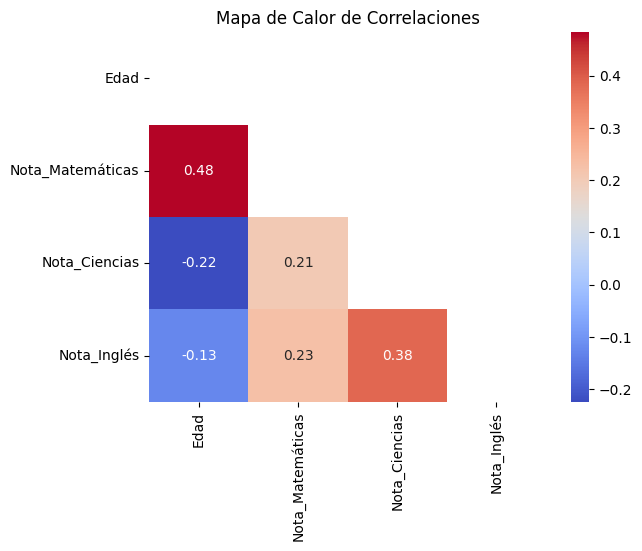

In [108]:
#Mapa de calor para mostrar la correlacion
# Crear un dataset simulado (asegúrate de tener este paso antes si no lo tienes)
np.random.seed(42)
data = {
    "Estudiante": [f"E{i}" for i in range(1, 21)],
    "Edad": np.random.randint(18, 25, size=20),
    "Género": np.random.choice(["Femenino", "Masculino"], size=20),
    "Nota_Matemáticas": np.random.normal(70, 10, size=20).round(1),
    "Nota_Ciencias": np.random.normal(75, 12, size=20).round(1),
    "Nota_Inglés": np.random.normal(65, 15, size=20).round(1),
}
df = pd.DataFrame(data)

# Seleccionar solo las variables numéricas (int y float)
variables_numericas = df.select_dtypes(include=["int", "float"])

# Calcular la matriz de correlación
correlaciones = variables_numericas.corr()
# Create a mask to hide the lower triangle of the matrix
mask = np.triu(np.ones_like(correlaciones, dtype=bool))

# Crear el mapa de calor
sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f", mask=mask)

# Añadir título al gráfico
plt.title("Mapa de Calor de Correlaciones")

# Mostrar el gráfico
plt.show()

In [ ]:
df["Aprobado_Matemáticas"] = df["Nota_Matemáticas"].apply(lambda x: "Sí" if x >= 60 else "No")# crea una nueva columna donde dice si pasas o no
df

,Estudiante,Edad,Género,Nota_Matemáticas,Nota_Ciencias,Nota_Inglés,Aprobado_Matemáticas
0,E1,24,Masculino,72.2,69.5,41.6,Sí
1,E2,21,Masculino,62.3,75.8,53.1,Sí
2,E3,22,Masculino,71.4,72.9,79.0,Sí
3,E4,24,Masculino,69.7,89.4,75.2,Sí
4,E5,20,Masculino,81.3,83.4,75.5,Sí
5,E6,22,Femenino,69.0,72.9,67.6,Sí
6,E7,22,Femenino,64.7,64.1,74.9,Sí
7,E8,24,Masculino,89.1,89.3,68.6,Sí
8,E9,19,Masculino,49.7,84.4,62.5,No
9,E10,20,Masculino,81.2,106.9,82.5,Sí


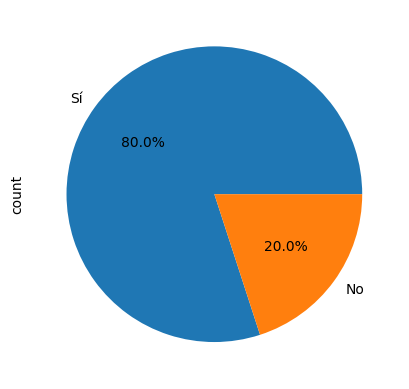

In [113]:
apobaciones=df.Aprobado_Matemáticas.value_counts()
apobaciones.plot(kind='pie', autopct="%1.1f%%")
plt.show()